# Regression

## Scope and Objectives

### Scope

In this lab I will attempt to build a regression model to predict the value of a continuous dependent variable given a list of features and an actual output.

### Objectives

In this lab, I will:

1. Load and generate regression datasets

2. Perform exploratory data analysis on the dataset. Analysis aspects to pay attention to
    - What are the features' data types?
    - Are the features normalized -- do they have a mean of 0 and a standard deviation of 1?
    - Does the dataset have missing values?
    - Are the features correlated? Use pandas corr() method to compute and display the correlation matrix. You can also generate pairplot of the features.
    - What is the shape of the dataset -- number of instances and number of features?

3. Split the dataset into training and test data subsets with a pre-defined ratio.

4. Create and train a linear regressor

5. Evaluate the performance of the linear regression developed in step 4. using the following metrics:
    - Mean-squared error (MSE)
    - Mean absolute error (MAE)
    - Coefficient of determination (R2)

6. Create and train a polynomial regressor with different polynomial degrees

7. Evaluate the performance of the polynomial regression developed in step 6. using MSE, MAE, and R2 metrics.

8. Compare the performance of the linear and polynomial regression models in terms of approximation (performance using the training dataset) and generalization (performance using the test dataset)

--------

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt

In [2]:
# fetch dataset:
# Source: https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant
# Features (X): Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) 
# Label (y): Net hourly electrical energy output (EP)  of the plant.
combined_cycle_power_plant = fetch_ucirepo(id=294) 
  
# data (as pandas dataframes) 
X = combined_cycle_power_plant.data.features 
y = combined_cycle_power_plant.data.targets

## Exploratory Data Analysis

In [3]:
# What are the columns' names of X?

# Calling .columns to show the column names
X.columns

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

In [4]:
# display a random subset of X of 10 samples (use the method sample)
import random
X.sample(10)


,AT,V,AP,RH
6058,21.47,60.77,1018.06,85.73
7869,11.17,44.77,1018.20,79.60
5294,11.15,40.64,1020.65,97.95
2252,22.68,59.54,1004.32,95.44
5916,10.67,45.00,1022.99,85.91
5622,13.43,43.69,1016.21,73.01
2330,9.59,38.56,1017.52,61.89
2917,17.36,41.23,998.08,63.46
3735,18.88,43.69,1016.77,46.88
2210,21.50,61.50,1008.43,78.13


In [5]:
# what are the datatypes of the features and the label?

# exploring the datatype of the features
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [6]:
# exploring the datatype of the labels
y.dtypes

PE    float64
dtype: object

In [7]:
# Does the features variable X or the label variable y contain missing data?
# you can either use the isna() or info() methods

#Print the sum of null or missing data for X
print(X.isna().sum())
#Print the sum of null or missing data for y

print(y.isna().sum())

AT    0
V     0
AP    0
RH    0
dtype: int64
PE    0
dtype: int64


In [8]:
# compute and display the correlation matrix of the features matrix X
# the correlation between AT and V features should be 0.844107
#Calling the .corr function to display the correlation matrix for the features matrix 
(pd.DataFrame(X)
 .corr()
 .style
 .background_gradient(cmap='PRGn', vmin=-1, vmax=1)
 )

,AT,V,AP,RH
AT,1.000000,0.844107,-0.507549,-0.542535
V,0.844107,1.000000,-0.413502,-0.312187
AP,-0.507549,-0.413502,1.000000,0.099574
RH,-0.542535,-0.312187,0.099574,1.000000


In [9]:
# display the statistics of each feature (column) of X using the describe() method.
# Are the features standardized (mean = 0, std = 1)? No, they must be standardized later on.
# using .describe() to show the statistics of each feature: 
X.describe()

,AT,V,AP,RH
count,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978
std,7.452473,12.707893,5.938784,14.600269
min,1.810000,25.360000,992.890000,25.560000
25%,13.510000,41.740000,1009.100000,63.327500
50%,20.345000,52.080000,1012.940000,74.975000
75%,25.720000,66.540000,1017.260000,84.830000
max,37.110000,81.560000,1033.300000,100.160000


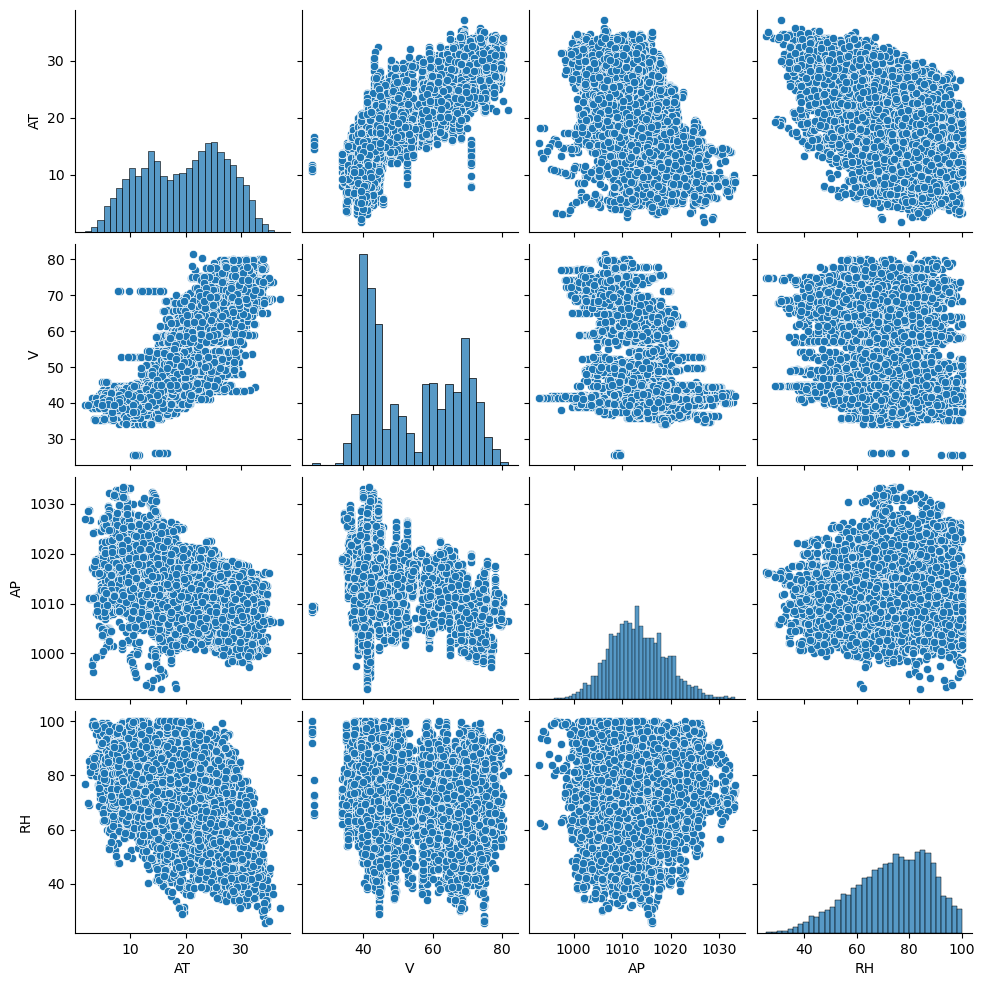

In [10]:
# using seaborn library to display a pairplot of the features
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# use this line of code:
sns.pairplot(X, kind="scatter")

--------

## Preprocessing and Data Split


In [11]:

# convert X and y into numpy arrays names features and label, respectively.

# converting X into numpy array and calling it features
features = X.values
# converting y into numpy array and calling it label, flatening it for regression 

label = y.values.flatten()

In [12]:

# standadize the features matrix
#standardizing the features matrix using StandardScaler()
scaler = StandardScaler()
features_standard=scaler.fit_transform(features)


In [13]:

# verify that the dataset is standardized (mean=0 and std=1 of each feature)
# you can complete this task by either using pandas (convert features_standard to pd.DataFrame)
# OR
# using the np.mean() and np.std() methods of numpy
# I used the conversion and .describe method to verify that the dataset is standardized.
pd.DataFrame(features_standard).describe()


,0,1,2,3
count,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03
mean,2.937078e-16,-1.941962e-16,5.469426e-15,-3.397505e-16
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-2.394126e+00,-2.277901e+00,-3.430019e+00,-3.270589e+00
25%,-8.240958e-01,-9.888705e-01,-7.003615e-01,-6.836860e-01
50%,9.309729e-02,-1.751604e-01,-5.373067e-02,1.141150e-01
75%,8.143721e-01,9.627745e-01,6.737290e-01,7.891378e-01
max,2.342804e+00,2.144779e+00,3.374760e+00,1.839173e+00


In [14]:
# split the dataset into training and test subsets. 
# test subset is 25% of the whole dataset
# set the random_seed to 1408
X_train, X_test, y_train, y_test = train_test_split(features_standard, label, test_size=0.25, random_state=1408)

# verifying the shapes of the obtained datasets

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (7176, 4)
X_test shape: (2392, 4)
y_train shape: (7176,)
y_test shape: (2392,)


-------------

## Linear Regression

In [15]:
# create a linear regression object, name it lr

# created a linear regression object called lr
lr = LinearRegression()


In [16]:
# train (fit) the linear regression using  X_train and y_train
#Training the linear regression model using X_train and y_train functions
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# predict the model's output for 1) X_train and 2) X_test
# name the variables lr_insample_pred and lr_outofsample_pred

#Predicts the models output on the training set
lr_insample_pred= lr.predict(X_train)
#Predicts the models output on the testing set
lr_outofsample_pred= lr.predict(X_test)


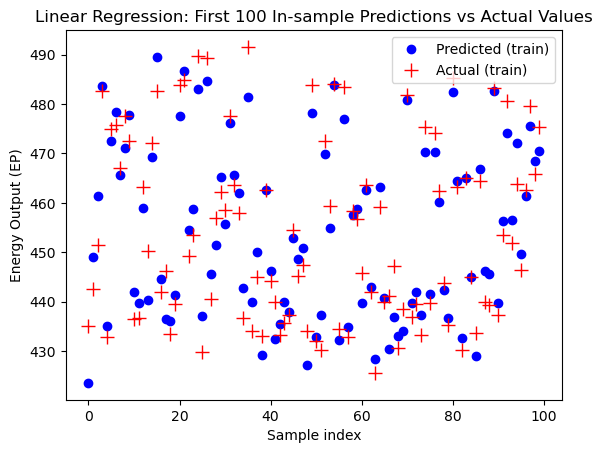

In [18]:
# create a scatter/plot plot that shows the first 100 samples of lr_insample_pred and y_train
# use a code similar to the following (add legends, x-axis and y-axis labels, etc.):
# plt.plot(lr_insample_pred[:100], linestyle='None', marker='o', c='blue')
# plt.plot(y_train[:100], linestyle='None', marker='+', c='red', markersize=10)
#Making
plt.plot(lr_insample_pred[:100], linestyle='None', marker='o', c='blue', label='Predicted (train)')
plt.plot(y_train[:100], linestyle='None', marker='+', c='red', markersize=10, label='Actual (train)')
plt.title("Linear Regression: First 100 In-sample Predictions vs Actual Values")
plt.xlabel("Sample index")
plt.ylabel("Energy Output (EP)")
plt.legend()
plt.show()


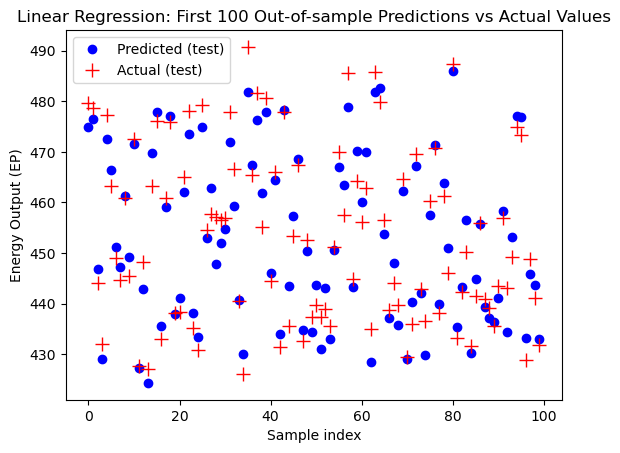

In [19]:
# create a scatter/plot plot that shows the first 100 samples of lr_outofsample_pred and y_train
# use a code similar to the following (add legends, x-axis and y-axis labels, etc.):
# plt.rcParams.update({'font.size': 14})
# plt.plot(lr_outofsample_pred[:100], linestyle='None', marker='o', c='blue')
# plt.plot(y_train[:100], linestyle='None', marker='+', c='red', markersize=10)plt.rcParams.update({'font.size': 14})
plt.plot(lr_outofsample_pred[:100], linestyle='None', marker='o', c='blue', label='Predicted (test)')
plt.plot(y_test[:100], linestyle='None', marker='+', c='red', markersize=10, label='Actual (test)')
plt.title("Linear Regression: First 100 Out-of-sample Predictions vs Actual Values")
plt.xlabel("Sample index")
plt.ylabel("Energy Output (EP)")
plt.legend()
plt.show()

In [20]:
# compute the in-sample mse, mae, and r2: name the variables
# lr_insample_mse, lr_insample_mae, lr_insample_r2
# display the results
lr_insample_mse = mean_squared_error(y_train, lr_insample_pred)
lr_insample_mae = mean_absolute_error(y_train, lr_insample_pred)
lr_insample_r2  = r2_score(y_train, lr_insample_pred)
print("In-sample MSE:", lr_insample_mse)
print("In-sample MAE:", lr_insample_mae)
print("In-sample R²:", lr_insample_r2)


In-sample MSE: 21.00105388379311
In-sample MAE: 3.630299390893698
In-sample R²: 0.9282915341510964


In [21]:
# compute the out-of-sample mse, mae, and r2: name the variables
# lr_outofsample_mse, lr_outofsample_mae, lr_outofsample_r2
# display the results
lr_outofsample_mse = mean_squared_error(y_test, lr_outofsample_pred)
lr_outofsample_mae = mean_absolute_error(y_test, lr_outofsample_pred)
lr_outofsample_r2  = r2_score(y_test, lr_outofsample_pred)
# Print the result of MSE, MAE and R²
print("Out-of-sample MSE:", lr_outofsample_mse)
print("Out-of-sample MAE:", lr_outofsample_mae)
print("Out-of-sample R²:", lr_outofsample_r2)


Out-of-sample MSE: 20.079958575654302
Out-of-sample MAE: 3.598301384114942
Out-of-sample R²: 0.9298104041536888


--------------

## Task 4: L2 regularized linear regression

In [22]:
# create a ridge regression object, name it ridge
# set alpha to 0.01
ridge = Ridge(alpha=0.01)


In [23]:

# train (fit) the ridge regression using  X_train and y_train
ridge.fit(X_train, y_train)


,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [24]:

# predict the model's output for 1) X_train and 2) X_test
# name the variables ridge_insample_pred and ridge_outofsample_pred


ridge_insample_pred=ridge.predict(X_train)

ridge_outofsample_pred=ridge.predict(X_test)


In [25]:

# compute the in-sample mse, mae, and r2: name the variables
# ridge_insample_mse, ridge_insample_mae, ridge_insample_r2
# display the results
ridge_insample_mse = mean_squared_error(y_train, ridge_insample_pred)
ridge_insample_mae = mean_absolute_error(y_train, ridge_insample_pred)
ridge_insample_r2  = r2_score(y_train, ridge_insample_pred)
# Print the result of MSE, MAE and R²
print("In-sample MSE:", ridge_insample_mse)
print("In-sample MAE:", ridge_insample_mae)
print("In-sample R²:", ridge_insample_r2)



In-sample MSE: 21.001053885895672
In-sample MAE: 3.6303010533614026
In-sample R²: 0.9282915341439173


In [26]:
# compute the out-of-sample mse, mae, and r2: name the variables
# ridge_outofsample_mse, ridge_outofsample_mae, ridge_outofsample_r2
# display the results
ridge_outofsample_mse = mean_squared_error(y_test, ridge_outofsample_pred)
ridge_outofsample_mae = mean_absolute_error(y_test, ridge_outofsample_pred)
ridge_outofsample_r2  = r2_score(y_test, ridge_outofsample_pred)
# Print the result of MSE, MAE and R²
print("Out-of-sample MSE:", ridge_outofsample_mse)
print("Out-of-sample MAE:", ridge_outofsample_mae)
print("Out-of-sample R²:", ridge_outofsample_r2)

Out-of-sample MSE: 20.079955168378874
Out-of-sample MAE: 3.5983022092519814
Out-of-sample R²: 0.9298104160638372


#### Both the linear regression (LR) and ridge regression models achieved nearly identical performance. Their in-sample and out-of-sample MSE, MAE, and R2 values differ only in the sixth decimal place which indicates that the ridge penalty had almost no effect.They both achieved the same result because the  Ridge regularization parameter (𝛼=0.01) is very small so the penalty term is too weak to noticeably shrink the coefficients. This also indicates that the data does not suffer from overfitting

-------------

## Polynomial regression

In [27]:
# order of the polynomial
order = 4

In [28]:
# create an object of PolynomialFeatures(degree=order)
#Created an object named polyn of PolynomialFeatures(degree=order)
polyn = PolynomialFeatures(degree=order)


In [29]:
# compute the Z matrices for X_train and X_test and display their obtained shapes
# name the resulting variables Z_train, and Z_test
Z_train= polyn.fit_transform(X_train)
print('size of the matrix Z for X_train:', X_poly.shape)
Z_test = polyn.transform(X_test)
print('size of the matrix Z for X_test:', X_predict.shape)


NameError: name 'X_poly' is not defined

In [ ]:
# standardize Z_train and Z_test
# standardized results are named Z_train_standard and Z_test_standard
standard = StandardScaler()
Z_train_standard= scaler.fit_transform(Z_train)
Z_test_standard= scaler.fit_transform(Z_test)


In [ ]:
pd.DataFrame(Z_train_standard).describe()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
count,7176.0,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03,...,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03
mean,0.0,1.782298e-17,1.881314e-16,6.931158e-17,-2.376397e-17,-5.562750e-15,-3.574497e-15,5.544927e-16,8.020340e-17,-1.704570e-15,...,2.831873e-16,-2.274905e-16,2.688299e-16,-3.089316e-16,3.584399e-16,2.515020e-16,1.000067e-16,-2.435064e-15,-3.935908e-17,-4.158695e-17
std,0.0,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,...,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00
min,0.0,-2.384841e+00,-2.269453e+00,-3.446802e+00,-3.240354e+00,-1.016719e+00,-3.811487e+00,-5.456230e+00,-6.199343e+00,-1.344188e+00,...,-5.772986e-01,-8.686751e+00,-1.035336e+01,-1.426015e+01,-1.682170e+01,-2.953021e-01,-1.655626e+01,-4.154836e-01,-7.888425e+00,-3.739967e-01
25%,0.0,-8.212221e-01,-9.836787e-01,-6.960783e-01,-6.856517e-01,-8.026335e-01,-8.396149e-01,-4.457904e-01,-5.012654e-01,-7.799516e-01,...,-5.435431e-01,4.202224e-02,-4.156647e-02,-1.007117e-01,-2.432856e-02,-2.942487e-01,-1.144262e-01,-4.071671e-01,-1.348868e-01,-3.717018e-01
50%,0.0,8.247812e-02,-2.130028e-01,-5.818039e-02,1.214988e-01,-3.319391e-01,-1.280983e-01,2.380245e-01,2.920716e-01,-4.920248e-02,...,-3.813169e-01,2.372982e-01,1.961910e-01,1.946231e-01,2.231027e-01,-2.745324e-01,-8.179679e-02,-3.476978e-01,-8.612027e-02,-3.289436e-01
75%,0.0,8.181806e-01,9.741694e-01,6.759085e-01,7.838415e-01,5.656359e-01,6.983940e-01,5.463774e-01,6.256159e-01,5.162902e-01,...,1.411200e-01,2.489284e-01,2.416534e-01,2.415312e-01,2.431232e-01,-1.421067e-01,-9.168557e-03,-6.785525e-02,9.227964e-03,-9.374182e-02
max,0.0,2.349944e+00,2.054851e+00,3.372630e+00,1.831319e+00,4.805288e+00,3.983711e+00,6.785917e+00,3.113800e+00,5.662336e+00,...,1.507368e+01,1.006626e+01,5.732888e+00,7.701129e+00,6.735525e+00,1.279866e+01,8.584557e+00,1.197107e+01,1.271613e+01,1.580367e+01


In [ ]:
pd.DataFrame(Z_test_standard).describe()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
count,2392.0,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,...,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03,2.392000e+03
mean,0.0,2.227872e-17,1.158494e-16,2.079347e-17,1.039674e-17,8.413931e-16,-1.898890e-15,-3.319530e-16,1.924882e-15,-5.629091e-16,...,8.729546e-16,-5.940993e-17,1.165920e-16,-2.866529e-16,-1.915970e-16,3.059611e-16,1.336723e-17,-2.198167e-16,-5.792468e-17,8.332242e-16
std,0.0,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,...,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00,1.000209e+00
min,0.0,-2.319507e+00,-2.305685e+00,-3.025379e+00,-3.288183e+00,-1.027504e+00,-3.718800e+00,-5.514900e+00,-6.172832e+00,-1.333704e+00,...,-5.750160e-01,-9.734271e+00,-8.745865e+00,-1.109005e+01,-1.695135e+01,-3.190427e-01,-1.266136e+01,-4.277241e-01,-7.167566e+00,-3.826682e-01
25%,0.0,-8.250055e-01,-1.010162e+00,-7.055407e-01,-6.827289e-01,-8.131462e-01,-8.214452e-01,-4.363106e-01,-5.275654e-01,-7.538147e-01,...,-5.401241e-01,7.828681e-03,-5.658274e-02,-1.570163e-01,-5.133476e-02,-3.178425e-01,-1.224738e-01,-4.176307e-01,-1.139038e-01,-3.796951e-01
50%,0.0,1.344734e-01,-3.695580e-02,-3.800663e-02,8.782923e-02,-3.423839e-01,-1.473869e-01,2.292605e-01,2.533319e-01,-5.025170e-02,...,-3.725736e-01,2.480993e-01,1.796497e-01,1.939385e-01,2.133525e-01,-2.937797e-01,-8.924622e-02,-3.506610e-01,-5.555047e-02,-3.324930e-01
75%,0.0,8.103094e-01,9.714551e-01,6.826791e-01,7.982642e-01,5.737941e-01,6.967885e-01,5.626422e-01,6.260888e-01,4.993556e-01,...,1.513885e-01,2.616674e-01,2.288833e-01,2.486380e-01,2.340520e-01,-1.280948e-01,-5.021018e-03,-5.704506e-02,5.727759e-02,-7.016796e-02
max,0.0,1.991594e+00,2.090955e+00,3.364534e+00,1.863829e+00,4.380391e+00,3.692069e+00,4.147706e+00,3.469428e+00,5.493825e+00,...,1.467572e+01,7.671385e+00,5.740177e+00,8.393062e+00,4.808633e+00,1.313296e+01,8.493620e+00,1.246690e+01,1.188592e+01,1.706043e+01


In [ ]:
# create a linear regressor and fit it using Z_train_standard and y_train

#Training the model using linear regression
lr_poly = LinearRegression()           
lr_poly.fit(Z_train_standard, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# predict the model's output for 1) Z_train_standard and 2) Z_test_standard
# name the variables lr_poly_insample_pred and lr_poly_outofsample_pred
#Training the testing m
lr_poly_insample_pred = lr_poly.predict(Z_train_standard)
lr_poly_outofsample_pred = lr_poly.predict(Z_test_standard)


In [ ]:
# compute the in-sample mse, mae, and r2: name the variables
# lr_poly_insample_mse, lr_poly_insample_mae, lr_poly_insample_r2
# display the results
lr_poly_insample_mse = mean_squared_error(y_train,lr_poly_insample_pred) 
lr_poly_insample_mae = mean_absolute_error(y_train,lr_poly_insample_pred) 
lr_poly_insample_r2 = r2_score(y_train, lr_poly_insample_pred )
print("In-sample MSE:", lr_poly_insample_mse)
print("In-sample MAE:", lr_poly_insample_mae)
print("In-sample R²:", lr_poly_insample_r2)


In-sample MSE: 16.74153829574845
In-sample MAE: 3.1550404881875305
In-sample R²: 0.9428357246364077


In [ ]:

# compute the out-of-sample mse, mae, and r2: name the variables
# lr_poly_outofsample_mse, lr_poly_outofsample_mae, lr_poly_outofsample_r2
# display the results
lr_poly_outofsample_mse = mean_squared_error(y_test, lr_poly_outofsample_pred) 
lr_poly_outofsample_mae = mean_absolute_error(y_test, lr_poly_outofsample_pred)
lr_poly_outofsample_r2 = r2_score(y_test, lr_poly_outofsample_pred)
print("Out-of-sample MSE:", lr_poly_outofsample_mse)
print("Out-of-sample MAE:", lr_poly_outofsample_mae)
print("Out-of-sample R²:", lr_poly_outofsample_r2)


Out-of-sample MSE: 16.953710151511405
Out-of-sample MAE: 3.1860963039631662
Out-of-sample R²: 0.9407382211897161


------------

## Comment on the obtained results

The models show a clear performance difference between Linear Regression models, Ridge Regression Models and Polynomial Regression models. The Linear Regression model achieved an in-sample MSE of approximately 21.00 and an out-of-sample MSE of 20.08, with a MAE of about 3.6 and 3.63 and R2 of about 0.93 for both. The Ridge Regression model achieved almost identical values, which indicated that the data is not experiencing any overfitting issues, since the penalty term had negligible effect. The Polynomial Regression model significantly improved performance, lowering both the in-sample and out-of-sample MSE & MAE to around 16.7–16.9 & 3.16-3.19, and increasing the R2 to approximately 0.94. The small gap between training and testing metrics shows that the model captures underlying nonlinear relationships without overfitting. It's higher accuracy demonstrates that including polynomial terms allows the model to represent complex dependencies that a simple linear model cannot. The Polynomial Regression model provides the best balance between fit and generalization. It outperforms both the Linear and Ridge models in all metrics while maintaining stability between training and testing results. So therefore, I would recommend using the polynomial Regression Model for this specific problem as it best captures the nonlinear patterns in the data and achieves the highest predictive accuracy.